In [1]:
#Import Python Data Science and Machine Learning Libraries 

#Python Libraries
import pandas as pd
import pylab as pl
import numpy as np
import itertools

#Frameworks
import tensorflow as tf

#Visualizations and Graphics
%matplotlib inline
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
!conda install python-graphviz --yes
import graphviz
from sklearn.tree import export_graphviz
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
plt.rcParams['figure.figsize'] = (10, 6)
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import classification_report

#Models
from sklearn import svm
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.dummy import DummyClassifier
from sklearn import tree

#Model Parameters
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.datasets import make_classification

#Model Metrics
import sklearn.metrics as metrics
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import recall_score, precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score


C:\Users\cwl\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\cwl\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\cwl\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\cwl\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type

Solving environment: ...working... done

# All requested packages already installed.



In [2]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot
    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix
    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']
    title:        the text to display at the top of the matrix
    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues
    normalize:    If False, plot the raw numbers
                  If True, plot the proportions
    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph
    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.2f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.2f}; misclass={:0.2f}'.format(accuracy, misclass))
    plt.show()

In [3]:
model_df = pd.read_csv('model_df.csv',index_col = 0)
model_df.head()

,X,Y,INTKEY,SEVCODE,SEVERITYDESC,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,...,HofD,Year,Month,Day,colltype_code,addrtype_code,junctype_code,weather_code,roadcond_code,lightcond_code
0,-122.323148,47.703140,1.0,2.0,1.0,2.0,0.0,0.0,2.0,11.0,...,15.0,2013.0,3.0,27.0,0.0,2.0,1.0,11.0,9.0,9.0
1,-122.347294,47.647172,0.0,1.0,0.0,2.0,0.0,0.0,2.0,16.0,...,19.0,2006.0,12.0,20.0,9.0,1.0,4.0,11.0,9.0,9.0
2,-122.334540,47.607871,0.0,1.0,0.0,4.0,0.0,0.0,3.0,14.0,...,10.0,2004.0,11.0,18.0,5.0,1.0,4.0,11.0,9.0,9.0
3,-122.334803,47.604803,0.0,1.0,0.0,3.0,0.0,0.0,3.0,11.0,...,9.0,2013.0,3.0,29.0,4.0,1.0,4.0,11.0,9.0,9.0
4,-122.306426,47.545739,1.0,2.0,1.0,2.0,0.0,0.0,2.0,11.0,...,8.0,2004.0,1.0,28.0,0.0,2.0,1.0,11.0,9.0,9.0


In [4]:
model_correl_df = model_df.corr()
model_correl_df.to_csv('model_correl_df.csv')
model_correl_df

,X,Y,INTKEY,SEVCODE,SEVERITYDESC,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,...,HofD,Year,Month,Day,colltype_code,addrtype_code,junctype_code,weather_code,roadcond_code,lightcond_code
X,1.000000,-0.160262,0.005837,0.010193,0.006582,0.013003,0.011049,-0.001772,-0.011080,0.010664,...,0.010550,0.008515,0.001111,-0.002124,0.008160,0.005452,-0.014606,-0.008990,-0.007504,-0.005898
Y,-0.160262,1.000000,0.034159,0.017538,0.015955,-0.013750,0.010255,0.025751,0.016637,-0.019384,...,0.015222,-0.015793,0.005482,0.001598,-0.034172,0.031907,-0.034425,0.024324,0.018677,0.026826
INTKEY,0.005837,0.034159,1.000000,0.199089,0.121413,0.067314,0.144384,0.084983,-0.053760,-0.042005,...,0.060240,0.092775,0.020086,0.023248,-0.458307,0.911708,-0.817339,0.004644,0.005836,0.014465
SEVCODE,0.010193,0.017538,0.199089,1.000000,0.798391,0.131106,0.244189,0.213417,-0.037796,0.176616,...,0.055722,0.082250,0.026834,0.020758,-0.143921,0.172032,-0.221984,-0.126911,-0.112581,-0.105271
SEVERITYDESC,0.006582,0.015955,0.121413,0.798391,1.000000,0.077853,0.189623,0.165109,-0.178556,0.147875,...,-0.109804,-0.426093,-0.135642,-0.144974,0.057944,0.236959,0.070671,-0.070066,-0.061696,-0.051425
PERSONCOUNT,0.013003,-0.013750,0.067314,0.131106,0.077853,1.000000,-0.021678,-0.037689,0.384922,-0.153336,...,0.058466,0.015147,0.015106,0.016505,-0.020606,0.052997,-0.100938,0.199154,0.174985,0.207750
PEDCOUNT,0.011049,0.010255,0.144384,0.244189,0.189623,-0.021678,1.000000,-0.016417,-0.250677,0.273919,...,0.038552,0.040699,0.015093,0.014294,0.067898,0.127093,-0.127089,-0.436186,-0.387597,-0.405574
PEDCYLCOUNT,-0.001772,0.025751,0.084983,0.213417,0.165109,-0.037689,-0.016417,1.000000,-0.244355,0.402440,...,0.035362,0.044242,0.015314,0.006813,-0.208641,0.073585,-0.091451,-0.124484,-0.127377,-0.082598
VEHCOUNT,-0.011080,0.016637,-0.053760,-0.037796,-0.178556,0.384922,-0.250677,-0.244355,1.000000,-0.402974,...,0.175164,0.152571,0.076145,0.073476,-0.109506,-0.102884,-0.052955,0.416988,0.363946,0.418055
SDOT_COLCODE,0.010664,-0.019384,-0.042005,0.176616,0.147875,-0.153336,0.273919,0.402440,-0.402974,1.000000,...,-0.028103,-0.001137,0.005905,0.002280,0.000702,-0.027925,-0.035757,-0.644981,-0.560359,-0.620985


In [5]:
# Shuffle the Dataset.
shuffled_df = model_df.sample(frac=1,random_state=4)

# Put all the sev2 class in a separate dataset.
sev2_df = shuffled_df.loc[shuffled_df['SEVCODE'] == 2]
sev2_df.shape[0]

58188

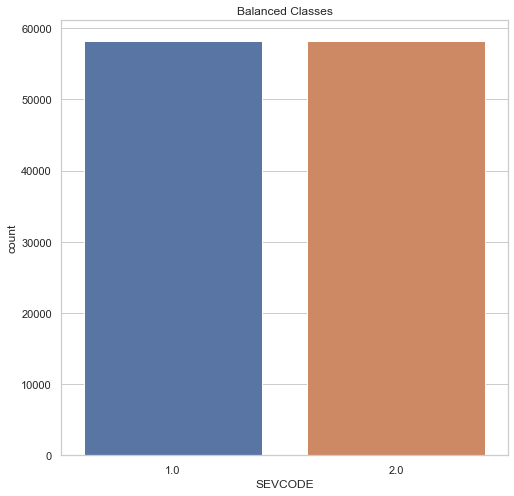

In [80]:
#Randomly select 492 observations from the non-fraud (majority class)
sev1_df = shuffled_df.loc[shuffled_df['SEVCODE'] == 1].sample(n=sev2_df.shape[0],random_state=42)

# Concatenate both dataframes again
undersampled_df = pd.concat([sev1_df, sev2_df])

undersampled_df = undersampled_df.sample(frac=1).reset_index(drop=True)

#plot the dataset after the undersampling
plt.figure(figsize=(8, 8))
sns.countplot('SEVCODE', data=undersampled_df)
plt.title('Balanced Classes')
plt.show()

In [81]:
unsamp_model_correl_df = undersampled_df.corr()
unsamp_model_correl_df.to_csv('unsamp_model_correl_df.csv')
unsamp_model_correl_df

,X,Y,INTKEY,SEVCODE,SEVERITYDESC,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,...,HofD,Year,Month,Day,colltype_code,addrtype_code,junctype_code,weather_code,roadcond_code,lightcond_code
X,1.000000,-0.162887,0.002240,0.009592,0.005708,0.012544,0.011908,-0.003797,-0.009521,0.006433,...,0.016947,0.010823,-0.000045,0.001725,0.011325,0.001981,-0.010452,-0.007885,-0.005980,-0.005139
Y,-0.162887,1.000000,0.041632,0.020087,0.019273,-0.014985,0.011404,0.032036,0.011377,-0.011493,...,0.017125,-0.015553,0.006166,0.002390,-0.036618,0.039427,-0.042323,0.018851,0.014163,0.021103
INTKEY,0.002240,0.041632,1.000000,0.211984,0.155866,0.051729,0.157266,0.087900,-0.077595,-0.035114,...,0.061533,0.087434,0.014342,0.022236,-0.470648,0.931712,-0.836832,-0.009824,-0.007502,0.001033
SEVCODE,0.009592,0.020087,0.211984,1.000000,0.861096,0.137470,0.214437,0.187797,-0.039622,0.175444,...,0.062098,0.097281,0.027452,0.020591,-0.155987,0.187032,-0.245849,-0.129357,-0.115101,-0.108290
SEVERITYDESC,0.005708,0.019273,0.155866,0.861096,1.000000,0.097898,0.179560,0.156821,-0.138895,0.154076,...,-0.063298,-0.309704,-0.094553,-0.103424,-0.006252,0.234364,-0.021931,-0.088312,-0.078496,-0.068935
PERSONCOUNT,0.012544,-0.014985,0.051729,0.137470,0.097898,1.000000,-0.038733,-0.057198,0.405304,-0.160035,...,0.056160,0.006870,0.011272,0.014044,-0.017393,0.040029,-0.086493,0.199728,0.174717,0.208388
PEDCOUNT,0.011908,0.011404,0.157266,0.214437,0.179560,-0.038733,1.000000,-0.033884,-0.298893,0.301256,...,0.042958,0.045038,0.016608,0.015725,0.099175,0.141250,-0.139657,-0.506774,-0.449494,-0.480523
PEDCYLCOUNT,-0.003797,0.032036,0.087900,0.187797,0.156821,-0.057198,-0.033884,1.000000,-0.290296,0.450366,...,0.039361,0.052137,0.016929,0.004490,-0.245978,0.077706,-0.097270,-0.137760,-0.142033,-0.091113
VEHCOUNT,-0.009521,0.011377,-0.077595,-0.039622,-0.138895,0.405304,-0.298893,-0.290296,1.000000,-0.435901,...,0.143104,0.110413,0.055182,0.053579,-0.069244,-0.112397,-0.012411,0.450001,0.394588,0.447652
SDOT_COLCODE,0.006433,-0.011493,-0.035114,0.175444,0.154076,-0.160035,0.301256,0.450366,-0.435901,1.000000,...,-0.012367,0.014535,0.010887,0.004745,-0.003074,-0.027143,-0.019621,-0.687262,-0.608257,-0.653468


In [82]:
predictor_df = model_df.copy()
predictor_df.drop('SEVCODE', axis = 1, inplace = True)
target_df = model_df.copy()
target_df = target_df[['SEVCODE']] - 1

In [83]:
predictor_df = predictor_df.reset_index(drop=True)
target_df = target_df.reset_index(drop=True)

In [84]:
predictor_df.head(5)

,X,Y,INTKEY,SEVERITYDESC,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,INATTENTIONIND,...,HofD,Year,Month,Day,colltype_code,addrtype_code,junctype_code,weather_code,roadcond_code,lightcond_code
0,-122.323148,47.703140,1.0,1.0,2.0,0.0,0.0,2.0,11.0,0.0,...,15.0,2013.0,3.0,27.0,0.0,2.0,1.0,11.0,9.0,9.0
1,-122.347294,47.647172,0.0,0.0,2.0,0.0,0.0,2.0,16.0,0.0,...,19.0,2006.0,12.0,20.0,9.0,1.0,4.0,11.0,9.0,9.0
2,-122.334540,47.607871,0.0,0.0,4.0,0.0,0.0,3.0,14.0,0.0,...,10.0,2004.0,11.0,18.0,5.0,1.0,4.0,11.0,9.0,9.0
3,-122.334803,47.604803,0.0,0.0,3.0,0.0,0.0,3.0,11.0,0.0,...,9.0,2013.0,3.0,29.0,4.0,1.0,4.0,11.0,9.0,9.0
4,-122.306426,47.545739,1.0,1.0,2.0,0.0,0.0,2.0,11.0,0.0,...,8.0,2004.0,1.0,28.0,0.0,2.0,1.0,11.0,9.0,9.0


In [85]:
count_sev0 = len(target_df[target_df['SEVCODE']==0])
count_sev1 = len(target_df[target_df['SEVCODE']==1])
pct_sev0 = count_sev0/(count_sev0+count_sev1)
print("percentage sev0", round(pct_sev0*100,2))
pct_sev1 = count_sev1/(count_sev0+count_sev1)
print("percentage sev1", round(pct_sev1*100,2))

percentage sev0 70.11
percentage sev1 29.89


In [86]:
x = predictor_df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
nmodel_df = pd.DataFrame(x_scaled, index=predictor_df.index, columns=predictor_df.columns)
nmodel_df

,X,Y,INTKEY,SEVERITYDESC,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,INATTENTIONIND,...,HofD,Year,Month,Day,colltype_code,addrtype_code,junctype_code,weather_code,roadcond_code,lightcond_code
0,0.532596,0.870053,1.0,0.5,0.024691,0.0,0.0,0.166667,0.159420,0.0,...,0.625000,0.86,0.181818,0.866667,0.0,0.666667,0.142857,1.000000,1.0,1.000000
1,0.398557,0.635455,0.0,0.0,0.024691,0.0,0.0,0.166667,0.231884,0.0,...,0.791667,0.72,1.000000,0.633333,0.9,0.333333,0.571429,1.000000,1.0,1.000000
2,0.469359,0.470718,0.0,0.0,0.049383,0.0,0.0,0.250000,0.202899,0.0,...,0.416667,0.68,0.909091,0.566667,0.5,0.333333,0.571429,1.000000,1.0,1.000000
3,0.467897,0.457855,0.0,0.0,0.037037,0.0,0.0,0.250000,0.159420,0.0,...,0.375000,0.86,0.181818,0.933333,0.4,0.333333,0.571429,1.000000,1.0,1.000000
4,0.625423,0.210281,1.0,0.5,0.024691,0.0,0.0,0.166667,0.159420,0.0,...,0.333333,0.68,0.000000,0.900000,0.0,0.666667,0.142857,1.000000,1.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194668,0.712022,0.292726,0.0,0.5,0.037037,0.0,0.0,0.166667,0.159420,0.0,...,0.333333,0.96,0.909091,0.366667,0.2,0.333333,0.571429,1.000000,1.0,1.000000
194669,0.413924,0.818844,0.0,0.0,0.024691,0.0,0.0,0.166667,0.202899,0.0,...,0.375000,0.96,1.000000,0.566667,0.7,0.333333,0.571429,1.000000,1.0,1.000000
194670,0.623967,0.785828,1.0,0.5,0.037037,0.0,0.0,0.166667,0.159420,0.0,...,0.375000,0.98,0.000000,0.600000,0.3,0.666667,0.142857,1.000000,1.0,1.000000
194671,0.354024,0.767751,1.0,0.5,0.024691,0.0,0.5,0.083333,0.739130,0.0,...,0.708333,0.98,0.000000,0.466667,0.1,0.666667,0.142857,0.090909,0.0,0.666667


# Phase 4: From Modeling to Evaluation

# Step 7 Data Science Methodology - Modeling:

Common ratios for Training/Validation/Test splits are:

60% train, 20% val, 20% test.

70% train, 15% val, 15% test.

80% train, 10% val, 10% test.

In [87]:
#Create Training, Validation and Test Sets from full dataset:

Xtr_val = nmodel_df.iloc[0:155738,:]
ytr_val = target_df.iloc[0:155738,0]

Xtst = nmodel_df.iloc[155739:194673,:]
ytst = target_df.iloc[155739:194673,0]
#print(X.head(3))

X_train, X_val, y_train, y_val = train_test_split(Xtr_val, ytr_val, test_size = 0.2, random_state=0)
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_val shape: ', X_val.shape)
print('y_val shape: ', y_val.shape)
print('Xtst shape: ', Xtst.shape)
print('ytst shape: ', ytst.shape)

X_train shape:  (124590, 24)
y_train shape:  (124590,)
X_val shape:  (31148, 24)
y_val shape:  (31148,)
Xtst shape:  (38934, 24)
ytst shape:  (38934,)


[LibSVM]Average precision-recall score: 0.99


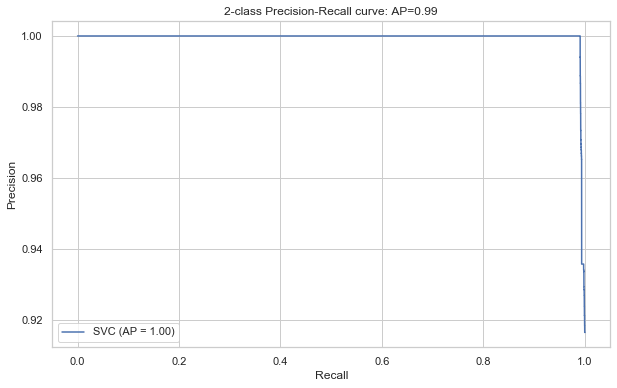

In [88]:
# Using X_train, X_test, y_train, y_test (as defined above), train a SVC classifer using the default parameters. 
# What is the accuracy, recall, and precision of this classifier?
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.metrics import average_precision_score

# *This function should a return a tuple with three floats, i.e. `(accuracy score, recall score, precision score)`.*
#def SVC_classifier():

svm = SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
              decision_function_shape='ovr', degree=3, gamma='scale',
              kernel='rbf', max_iter=-1, probability=False, random_state=None,
              shrinking=True, tol=0.001, verbose=1).fit(X_train, y_train)
y_pred = svm.predict(X_val)
accuracy_sc = svm.score(X_val, y_val)
recall_sc = recall_score(y_val, y_pred)
precision_sc = precision_score(y_val, y_pred)
average_precision = average_precision_score(y_val, y_pred)
disp = plot_precision_recall_curve(svm, X_val, y_val)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))
print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))
#    return ("Accuracy: ",accuracy_sc, "Recall: ", recall_sc, "Precision: ", precision_sc, "y_pred : ",y_pred)
#SVC_classifier()

In [89]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     22030
         1.0       1.00      0.99      1.00      9118

    accuracy                           1.00     31148
   macro avg       1.00      1.00      1.00     31148
weighted avg       1.00      1.00      1.00     31148



In [90]:
cm_svm = metrics.confusion_matrix(y_val, y_pred)
cm_svm

array([[22030,     0],
       [   84,  9034]], dtype=int64)

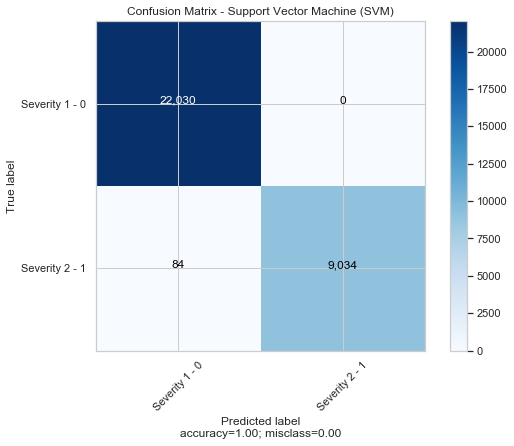

In [91]:
plot_confusion_matrix(cm_svm  , 
                      normalize    = False,
                      target_names = ['Severity 1 - 0', 'Severity 2 - 1'],
                      title        = "Confusion Matrix - Support Vector Machine (SVM)")

In [92]:
# Train a logistic regression classifier with default parameters using X_train and y_train.
# For the logistic regression classifier, create a precision recall curve and a roc curve 
#using y_test and the probability estimates for X_test (probability it is fraud).
# Looking at the precision recall curve, what is the recall when the precision is `0.75`?
# Looking at the roc curve, what is the true positive rate when the false positive rate is `0.16`?
# *This function should return a tuple with two floats, i.e. `(recall, true positive rate)`.*

logreg = LogisticRegression(C=0.01, solver='liblinear',max_iter = 500)

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_val)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_val, y_val)))

Accuracy of logistic regression classifier on test set: 0.99


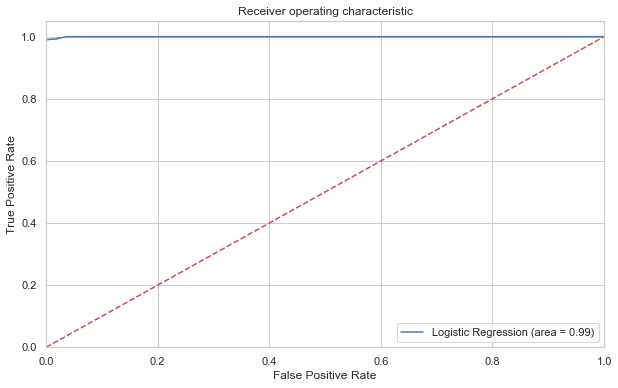

In [93]:
logit_roc_auc = roc_auc_score(y_val, logreg.predict(X_val))
fpr, tpr, thresholds = roc_curve(y_val, logreg.predict_proba(X_val)
[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' %
logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [94]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     22030
         1.0       0.96      0.99      0.98      9118

    accuracy                           0.99     31148
   macro avg       0.98      0.99      0.98     31148
weighted avg       0.99      0.99      0.99     31148



In [95]:
cm_lr = metrics.confusion_matrix(y_val, y_pred)
cm_lr

array([[21653,   377],
       [   68,  9050]], dtype=int64)

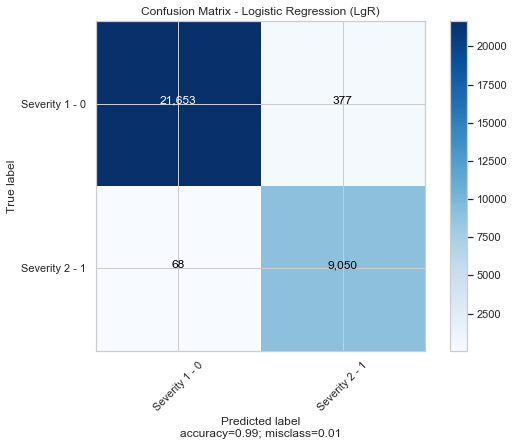

In [96]:
plot_confusion_matrix(cm_lr  , 
                      normalize    = False,
                      target_names = ['Severity 1 - 0', 'Severity 2 - 1'],
                      title        = "Confusion Matrix - Logistic Regression (LgR)")

In [97]:
model3 = MLPClassifier(hidden_layer_sizes=(27,27,10),
              activation='relu',
              solver='adam',
              learning_rate='adaptive',
              early_stopping=True,
              max_iter=500, alpha=0.0001,
              verbose=0,  random_state=21,)

model3.fit(X_train, y_train)
y_pred = model3.predict(X_val)
test_acc = accuracy_score(y_val, y_pred) * 100.
loss_values = model3.loss_curve_
#print (loss_values)
#print (test_acc)
#print (y_pred)

In [98]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     22030
         1.0       1.00      0.99      1.00      9118

    accuracy                           1.00     31148
   macro avg       1.00      1.00      1.00     31148
weighted avg       1.00      1.00      1.00     31148



In [99]:
cm_mlp = metrics.confusion_matrix(y_val, y_pred)
cm_mlp

array([[22030,     0],
       [   84,  9034]], dtype=int64)

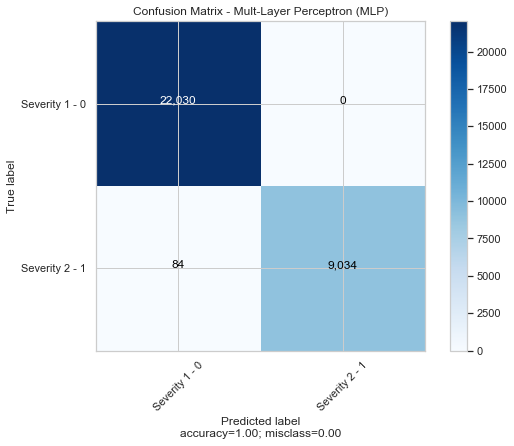

In [100]:
plot_confusion_matrix(cm_mlp  , 
                      normalize    = False,
                      target_names = ['Severity 1 - 0', 'Severity 2 - 1'],
                      title        = "Confusion Matrix - Mult-Layer Perceptron (MLP)")

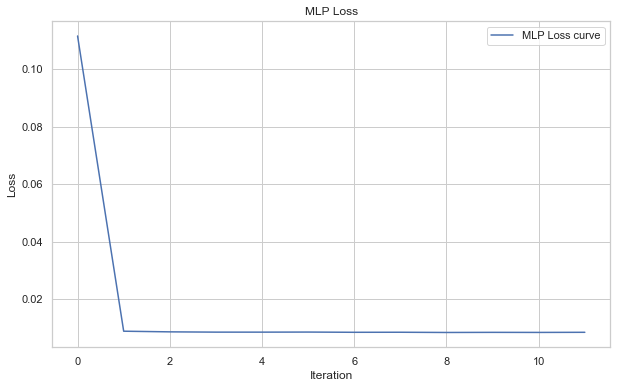

In [101]:
plt.figure()
plt.plot(loss_values, label='MLP Loss curve')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('MLP Loss')
plt.legend(loc="upper right")
plt.savefig('MLP_Loss')
plt.show()

# Balanced Data Set

In [105]:
predictorb_df = undersampled_df.copy()
predictorb_df.drop('SEVCODE', axis = 1, inplace = True)
targetb_df = undersampled_df.copy()
targetb_df = targetb_df[['SEVCODE']] - 1

In [106]:
predictorb_df = predictorb_df.reset_index(drop=True)
targetb_df = targetb_df.reset_index(drop=True)

In [108]:
count_sev0b = len(targetb_df[targetb_df['SEVCODE']==0])
count_sev1b = len(targetb_df[targetb_df['SEVCODE']==1])
pct_sev0b = count_sev0b/(count_sev0b+count_sev1b)
print("percentage sev0", round(pct_sev0b*100,2))
pct_sev1b = count_sev1b/(count_sev0b+count_sev1b)
print("percentage sev1", round(pct_sev1b*100,2))

percentage sev0 50.0
percentage sev1 50.0


In [109]:
xb = predictorb_df.values #returns a numpy array
min_max_scalerb = preprocessing.MinMaxScaler()
xb_scaled = min_max_scalerb.fit_transform(xb)
nmodelb_df = pd.DataFrame(xb_scaled, index=predictorb_df.index, columns=predictorb_df.columns)
nmodelb_df

,X,Y,INTKEY,SEVERITYDESC,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,INATTENTIONIND,...,HofD,Year,Month,Day,colltype_code,addrtype_code,junctype_code,weather_code,roadcond_code,lightcond_code
0,0.346295,0.828602,0.0,0.0,0.024691,0.0,0.0,0.181818,0.159420,0.0,...,0.000000,0.70,0.727273,0.200000,0.5,0.333333,0.571429,1.000000,1.0,1.000000
1,0.630098,0.365171,1.0,0.5,0.037037,0.0,0.0,0.181818,0.159420,0.0,...,0.000000,0.74,0.272727,0.266667,0.0,0.666667,0.142857,1.000000,1.0,1.000000
2,0.655986,0.704784,0.0,0.0,0.037037,0.0,0.0,0.181818,0.159420,0.0,...,0.625000,0.86,0.272727,0.766667,0.0,0.333333,0.285714,1.000000,1.0,1.000000
3,0.424357,0.483216,1.0,0.5,0.037037,0.0,0.0,0.181818,0.159420,0.0,...,0.000000,0.72,0.363636,0.200000,0.3,0.666667,0.142857,1.000000,1.0,1.000000
4,0.236557,0.640276,0.0,0.5,0.024691,0.0,0.0,0.181818,0.202899,0.0,...,0.750000,0.72,0.818182,0.766667,0.7,0.333333,0.428571,1.000000,1.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116371,0.485822,0.961644,1.0,0.5,0.037037,0.0,0.0,0.181818,0.202899,0.0,...,0.791667,0.74,0.909091,0.466667,0.0,0.666667,0.142857,1.000000,1.0,1.000000
116372,0.237911,0.289937,1.0,0.0,0.061728,0.0,0.0,0.181818,0.159420,0.0,...,0.875000,0.76,0.272727,0.466667,0.9,0.666667,0.142857,1.000000,1.0,1.000000
116373,0.646205,0.668622,0.0,0.5,0.012346,0.0,0.5,0.000000,0.420290,0.0,...,0.666667,0.88,0.181818,0.200000,0.1,0.333333,0.571429,0.363636,0.0,0.555556
116374,0.385988,0.543522,0.0,0.0,0.024691,0.0,0.0,0.181818,0.159420,0.0,...,0.875000,0.96,0.272727,0.200000,0.3,0.333333,0.285714,1.000000,1.0,1.000000


In [110]:
#Create Training, Validation and Test Sets from full dataset:

Xtrb_val = nmodelb_df.iloc[0:93101,:]
ytrb_val = targetb_df.iloc[0:93101,0]

Xtstb = nmodelb_df.iloc[93102:116376,:]
ytstb = targetb_df.iloc[93102:116376,0]
#print(X.head(3))

Xb_train, Xb_val, yb_train, yb_val = train_test_split(Xtrb_val, ytrb_val, test_size = 0.2, random_state=0)
print('Xb_train shape: ', Xb_train.shape)
print('yb_train shape: ', yb_train.shape)
print('Xb_val shape: ', Xb_val.shape)
print('yb_val shape: ', yb_val.shape)
print('Xtstb shape: ', Xtstb.shape)
print('ytstb shape: ', ytstb.shape)

Xb_train shape:  (74480, 24)
yb_train shape:  (74480,)
Xb_val shape:  (18621, 24)
yb_val shape:  (18621,)
Xtstb shape:  (23274, 24)
ytstb shape:  (23274,)


In [111]:
# Train a logistic regression classifier with default parameters using X_train and y_train.
# For the logistic regression classifier, create a precision recall curve and a roc curve 
#using y_test and the probability estimates for X_test (probability it is fraud).
# Looking at the precision recall curve, what is the recall when the precision is `0.75`?
# Looking at the roc curve, what is the true positive rate when the false positive rate is `0.16`?
# *This function should return a tuple with two floats, i.e. `(recall, true positive rate)`.*

logregB = LogisticRegression(C=0.01, solver='liblinear',max_iter = 500)

logregB.fit(Xb_train, yb_train)

yb_pred = logregB.predict(Xb_val)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logregB.score(Xb_val, yb_val)))

Accuracy of logistic regression classifier on test set: 0.99


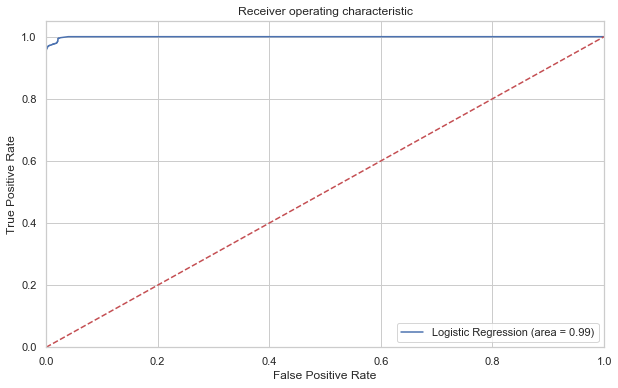

In [112]:
logit_roc_auc = roc_auc_score(yb_val, logregB.predict(Xb_val))
fpr, tpr, thresholds = roc_curve(yb_val, logregB.predict_proba(Xb_val)
[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' %
logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [113]:
print(classification_report(yb_val, yb_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.97      0.99      9430
         1.0       0.97      1.00      0.99      9191

    accuracy                           0.99     18621
   macro avg       0.99      0.99      0.99     18621
weighted avg       0.99      0.99      0.99     18621



In [114]:
cm_lr = metrics.confusion_matrix(yb_val, yb_pred)
cm_lr

array([[9192,  238],
       [  31, 9160]], dtype=int64)

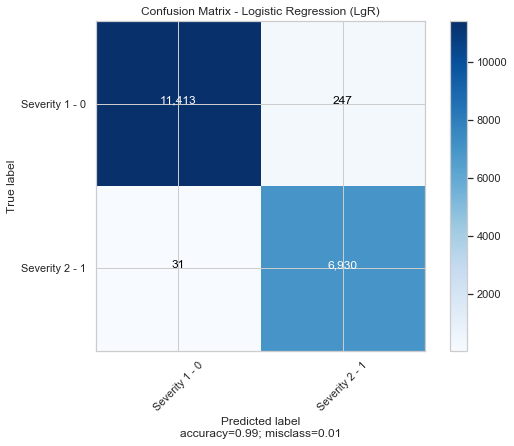

In [37]:
plot_confusion_matrix(cm_lr  , 
                      normalize    = False,
                      target_names = ['Severity 1 - 0', 'Severity 2 - 1'],
                      title        = "Confusion Matrix - Logistic Regression (LgR)")

In [115]:
model3b = MLPClassifier(hidden_layer_sizes=(27,27,10),
              activation='relu',
              solver='adam',
              learning_rate='adaptive',
              early_stopping=True,
              max_iter=500, alpha=0.0001,
              verbose=0,  random_state=21,)

model3b.fit(Xb_train, yb_train)
yb_pred = model3b.predict(Xb_val)
test_acc = accuracy_score(yb_val, yb_pred) * 100.
loss_values = model3b.loss_curve_
#print (loss_values)
#print (test_acc)
#print (y_pred)

In [116]:
print(classification_report(yb_val, yb_pred))

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      9430
         1.0       1.00      0.99      1.00      9191

    accuracy                           1.00     18621
   macro avg       1.00      1.00      1.00     18621
weighted avg       1.00      1.00      1.00     18621



In [117]:
cm_mlp = metrics.confusion_matrix(yb_val, yb_pred)
cm_mlp

array([[9427,    3],
       [  85, 9106]], dtype=int64)

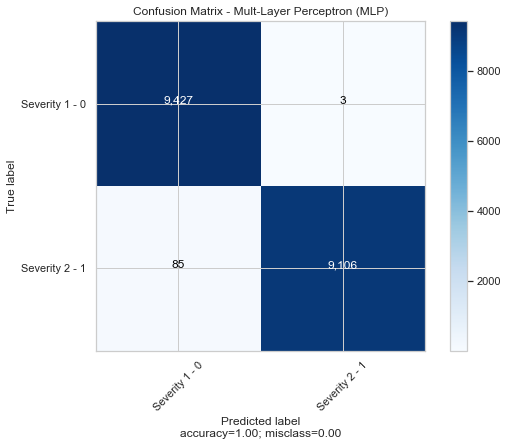

In [119]:
plot_confusion_matrix(cm_mlp  , 
                      normalize    = False,
                      target_names = ['Severity 1 - 0', 'Severity 2 - 1'],
                      title        = "Confusion Matrix - Mult-Layer Perceptron (MLP)")

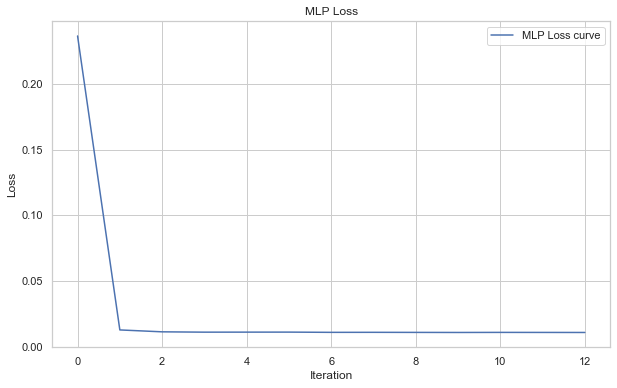

In [120]:
plt.figure()
plt.plot(loss_values, label='MLP Loss curve')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('MLP Loss')
plt.legend(loc="upper right")
plt.savefig('MLP_Loss')
plt.show()

[LibSVM]Average precision-recall score: 1.00


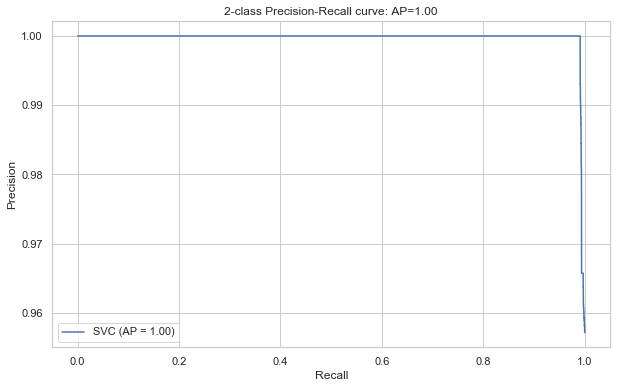

In [121]:
# Using X_train, X_test, y_train, y_test (as defined above), train a SVC classifer using the default parameters. 
# What is the accuracy, recall, and precision of this classifier?
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.metrics import average_precision_score

# *This function should a return a tuple with three floats, i.e. `(accuracy score, recall score, precision score)`.*
#def SVC_classifier():

svmb = SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
              decision_function_shape='ovr', degree=3, gamma='scale',
              kernel='rbf', max_iter=-1, probability=False, random_state=None,
              shrinking=True, tol=0.001, verbose=1).fit(X_train, y_train)
yb_pred = svmb.predict(Xb_val)
accuracy_sc = svmb.score(Xb_val, yb_val)
recall_sc = recall_score(yb_val, yb_pred)
precision_sc = precision_score(yb_val, yb_pred)
average_precision = average_precision_score(yb_val, yb_pred)
disp = plot_precision_recall_curve(svmb, Xb_val, yb_val)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))
print('Average precision-recall score: {0:0.2f}'.format(average_precision))
#    return ("Accuracy: ",accuracy_sc, "Recall: ", recall_sc, "Precision: ", precision_sc)
#SVC_classifier()

In [122]:
print(classification_report(yb_val, yb_pred))

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      9430
         1.0       1.00      0.99      1.00      9191

    accuracy                           1.00     18621
   macro avg       1.00      1.00      1.00     18621
weighted avg       1.00      1.00      1.00     18621



In [123]:
cm_svm = metrics.confusion_matrix(yb_val, yb_pred)
cm_svm

array([[9430,    0],
       [  85, 9106]], dtype=int64)

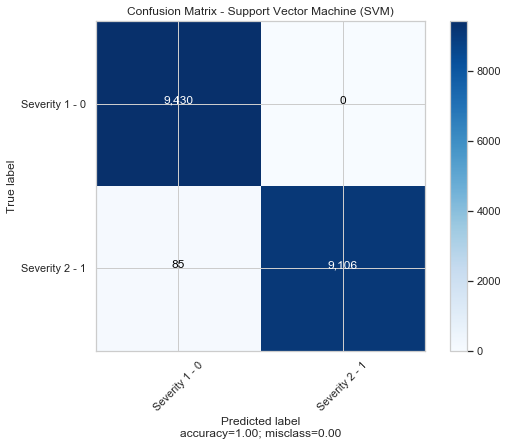

In [124]:
plot_confusion_matrix(cm_svm  , 
                      normalize    = False,
                      target_names = ['Severity 1 - 0', 'Severity 2 - 1'],
                      title        = "Confusion Matrix - Support Vector Machine (SVM)")

# Step 8 Data Science Methodology - Evaluation:

In [125]:
Xtst = nmodel_df.iloc[155739:194673,:]
ytst = target_df.iloc[155739:194673,0]


Average precision-recall score: 0.99


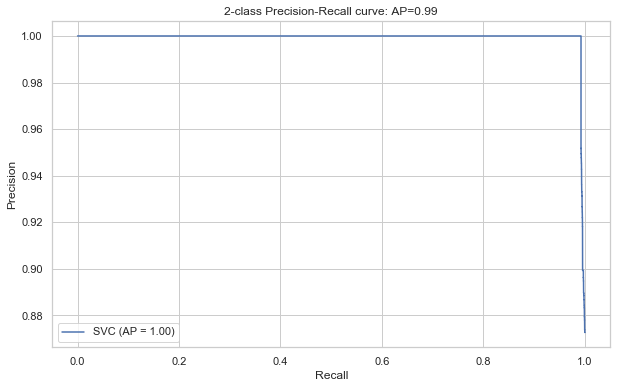

In [126]:
ytst_pred = svm.predict(Xtst)
accuracy_sc = svm.score(Xtst, ytst)
recall_sc = recall_score(ytst, ytst_pred)
precision_sc = precision_score(ytst, ytst_pred)
average_precision = average_precision_score(ytst, ytst_pred)
disp = plot_precision_recall_curve(svm, Xtst, ytst)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))
print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))


In [127]:
print(classification_report(ytst, ytst_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     26464
         1.0       1.00      0.99      1.00     12470

    accuracy                           1.00     38934
   macro avg       1.00      1.00      1.00     38934
weighted avg       1.00      1.00      1.00     38934



In [128]:
cm_svm = metrics.confusion_matrix(ytst, ytst_pred)
cm_svm

array([[26464,     0],
       [   94, 12376]], dtype=int64)

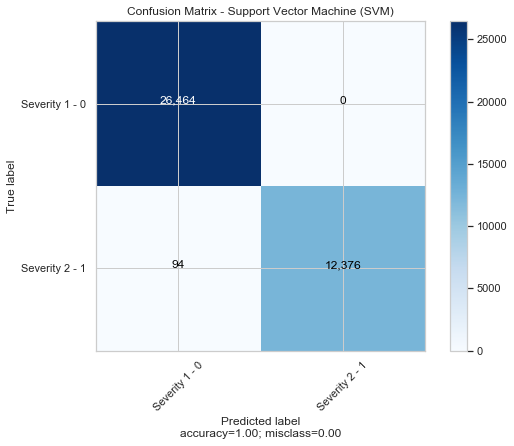

In [129]:
plot_confusion_matrix(cm_svm  , 
                      normalize    = False,
                      target_names = ['Severity 1 - 0', 'Severity 2 - 1'],
                      title        = "Confusion Matrix - Support Vector Machine (SVM)")

In [130]:
ytst_pred = logreg.predict(Xtst)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(Xtst, ytst)))


Accuracy of logistic regression classifier on test set: 0.98


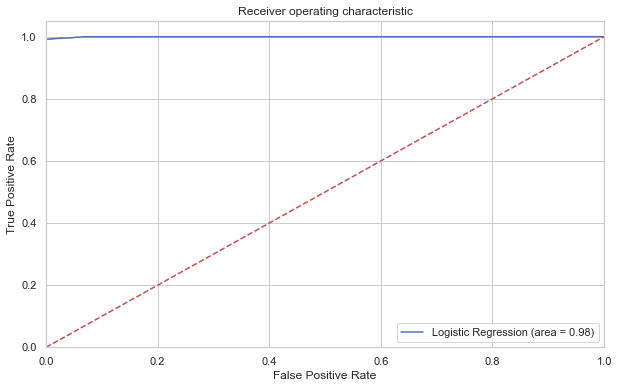

In [131]:
logit_roc_auc = roc_auc_score(ytst, logreg.predict(Xtst))
fpr, tpr, thresholds = roc_curve(ytst, logreg.predict_proba(Xtst)
[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' %
logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [132]:
print(classification_report(ytst, ytst_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.97      0.99     26464
         1.0       0.95      0.99      0.97     12470

    accuracy                           0.98     38934
   macro avg       0.97      0.98      0.98     38934
weighted avg       0.98      0.98      0.98     38934



In [133]:
cm_lr = metrics.confusion_matrix(ytst, ytst_pred)
cm_lr

array([[25787,   677],
       [   64, 12406]], dtype=int64)

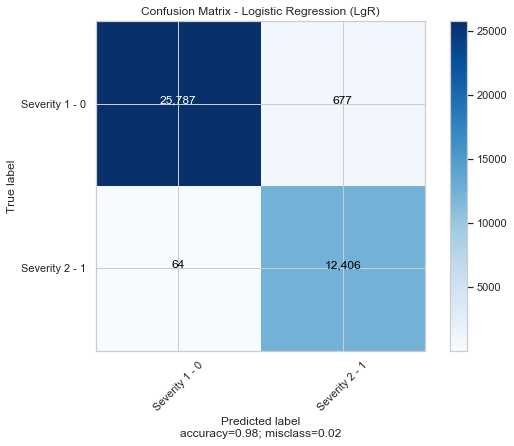

In [134]:
plot_confusion_matrix(cm_lr  , 
                      normalize    = False,
                      target_names = ['Severity 1 - 0', 'Severity 2 - 1'],
                      title        = "Confusion Matrix - Logistic Regression (LgR)")

In [135]:
ytst_pred = model3.predict(Xtst)
test_acc = accuracy_score(ytst, ytst_pred) * 100.
loss_values = model3.loss_curve_

In [136]:
print(classification_report(ytst, ytst_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     26464
         1.0       1.00      0.99      1.00     12470

    accuracy                           1.00     38934
   macro avg       1.00      1.00      1.00     38934
weighted avg       1.00      1.00      1.00     38934



In [137]:
cm_mlp = metrics.confusion_matrix(ytst, ytst_pred)
cm_mlp

array([[26464,     0],
       [   94, 12376]], dtype=int64)

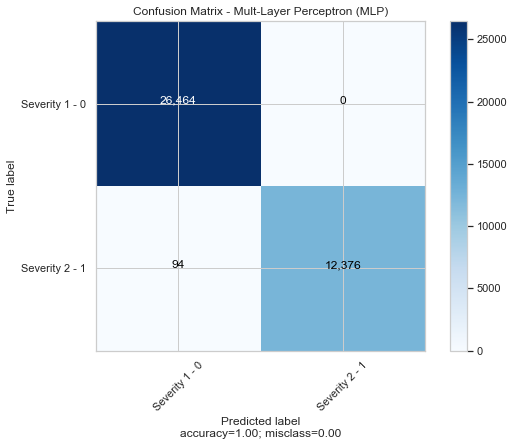

In [138]:
plot_confusion_matrix(cm_mlp  , 
                      normalize    = False,
                      target_names = ['Severity 1 - 0', 'Severity 2 - 1'],
                      title        = "Confusion Matrix - Mult-Layer Perceptron (MLP)")

# Balanced Data Test Set

In [139]:
Xtstb = nmodelb_df.iloc[93102:116376,:]
ytstb = targetb_df.iloc[93102:116376,0]
Xtstb.shape

(23274, 24)

Average precision-recall score: 1.00


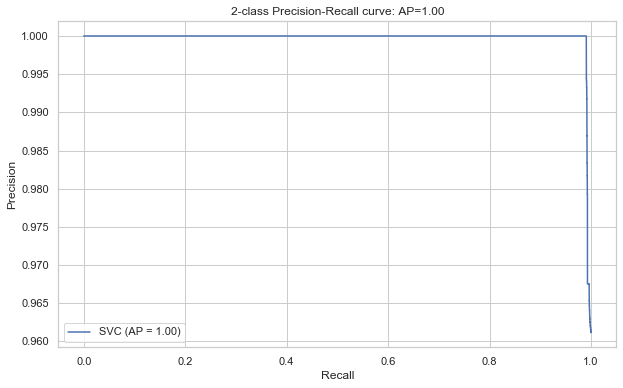

In [140]:
ytstb_pred = svmb.predict(Xtstb)
accuracy_sc = svmb.score(Xtstb, ytstb)
recall_sc = recall_score(ytstb, ytstb_pred)
precision_sc = precision_score(ytstb, ytstb_pred)
average_precision = average_precision_score(ytstb, ytstb_pred)
disp = plot_precision_recall_curve(svmb, Xtstb, ytstb)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))
print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))


In [141]:
print(classification_report(ytstb, ytstb_pred))

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00     11515
         1.0       1.00      0.99      1.00     11759

    accuracy                           1.00     23274
   macro avg       1.00      1.00      1.00     23274
weighted avg       1.00      1.00      1.00     23274



In [143]:
cm_svm = metrics.confusion_matrix(ytstb, ytstb_pred)
cm_svm

array([[11515,     0],
       [  108, 11651]], dtype=int64)

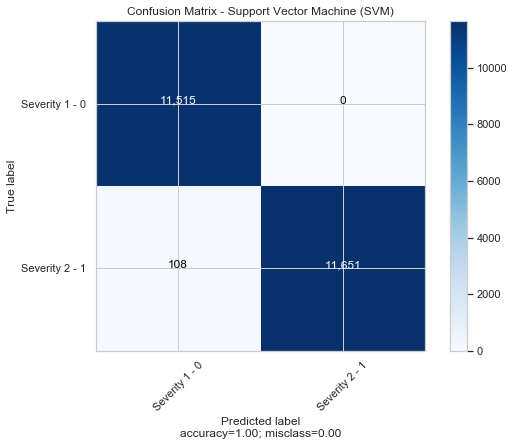

In [144]:
plot_confusion_matrix(cm_svm  , 
                      normalize    = False,
                      target_names = ['Severity 1 - 0', 'Severity 2 - 1'],
                      title        = "Confusion Matrix - Support Vector Machine (SVM)")

In [145]:
ytstb_pred = logregB.predict(Xtstb)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(Xtstb, ytstb)))


Accuracy of logistic regression classifier on test set: 0.99


In [146]:
print(classification_report(ytstb, ytstb_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     11515
         1.0       0.98      1.00      0.99     11759

    accuracy                           0.99     23274
   macro avg       0.99      0.99      0.99     23274
weighted avg       0.99      0.99      0.99     23274



In [147]:
cm_lr = metrics.confusion_matrix(ytstb, ytstb_pred)
cm_lr

array([[11241,   274],
       [   42, 11717]], dtype=int64)

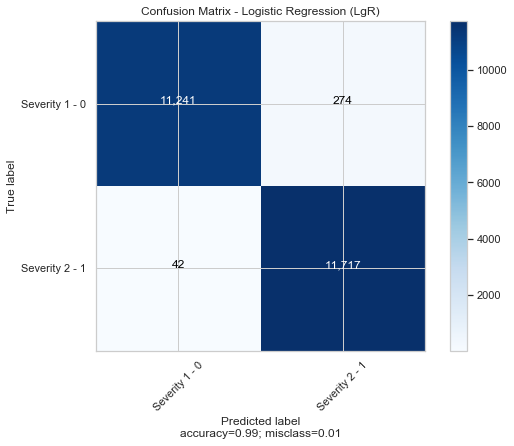

In [148]:
plot_confusion_matrix(cm_lr  , 
                      normalize    = False,
                      target_names = ['Severity 1 - 0', 'Severity 2 - 1'],
                      title        = "Confusion Matrix - Logistic Regression (LgR)")

In [150]:
ytstb_pred = model3b.predict(Xtstb)
test_acc = accuracy_score(ytstb, ytstb_pred) * 100.
loss_values = model3b.loss_curve_

In [151]:
print(classification_report(ytstb, ytstb_pred))

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00     11515
         1.0       1.00      0.99      1.00     11759

    accuracy                           1.00     23274
   macro avg       1.00      1.00      1.00     23274
weighted avg       1.00      1.00      1.00     23274



In [152]:
cm_mlp = metrics.confusion_matrix(ytstb, ytstb_pred)
cm_mlp

array([[11511,     4],
       [  106, 11653]], dtype=int64)

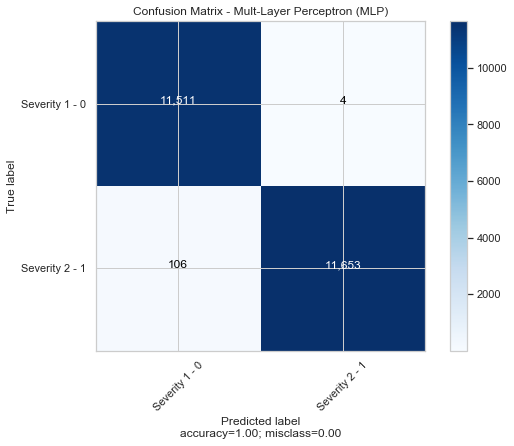

In [153]:
plot_confusion_matrix(cm_mlp  , 
                      normalize    = False,
                      target_names = ['Severity 1 - 0', 'Severity 2 - 1'],
                      title        = "Confusion Matrix - Mult-Layer Perceptron (MLP)")

# Step 9 - Deployment

# Performance Summary:

All three models exhibited robust performance in Validation and Test for both the unbalanced and balanced data sets.  MLP and SVM performance was almost identical with the Logistic Regression model faring a bit worse with approximately 1-2% false positive rates.

Conclusion - Either the SVM or MLP model should be chosen for deployment

# Confusion Matrix Summary

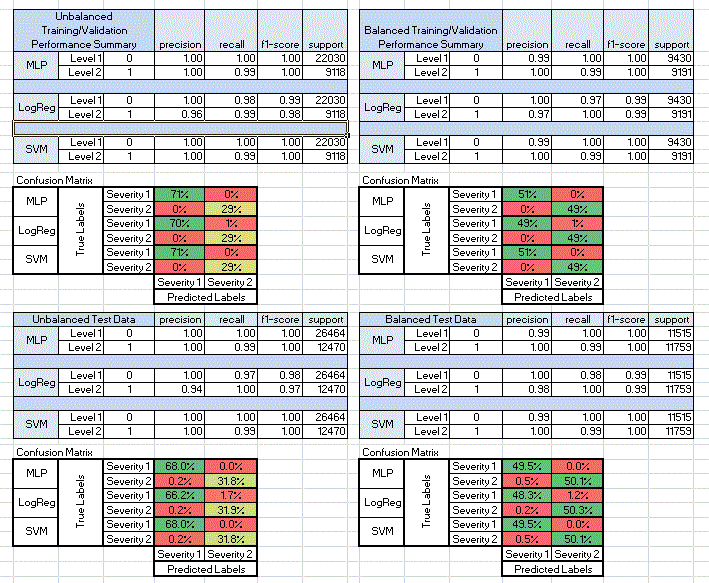

# Step 10 - Feedback 

No additional feedback required